In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("diabetes.csv")

feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = dados[feature_cols]
y = dados.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

Text(0, 0.5, 'Acurácia')

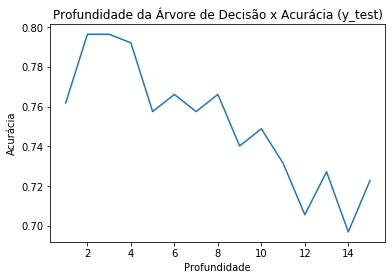

In [3]:
listMaxDepth = range(1, 16)
listAccuracyTest = []

for i in listMaxDepth:
    clfTest = DecisionTreeClassifier(max_depth=i)
    clfTest = clfTest.fit(X_train, y_train)
    y_predTest = clfTest.predict(X_test)
    listAccuracyTest.insert(i - 1, metrics.accuracy_score(y_test, y_predTest))
    
listAccuracyTest
plt.plot(listMaxDepth, listAccuracyTest)
plt.title('Profundidade da Árvore de Decisão x Acurácia (y_test)')
plt.xlabel('Profundidade')
plt.ylabel('Acurácia')

Text(0, 0.5, 'Acurácia')

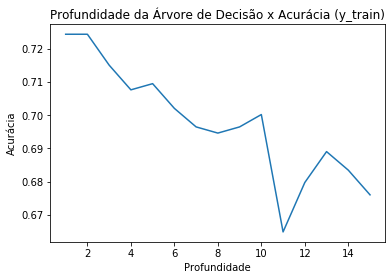

In [4]:
listAccuracyTrain = []

for i in listMaxDepth:
    clfTrain = DecisionTreeClassifier(max_depth=i)
    clfTrain = clfTrain.fit(X_test, y_test)
    y_predTrain = clfTrain.predict(X_train)
    listAccuracyTrain.insert(i - 1, metrics.accuracy_score(y_train, y_predTrain))

plt.plot(listMaxDepth, listAccuracyTrain)
plt.title('Profundidade da Árvore de Decisão x Acurácia (y_train)')
plt.xlabel('Profundidade')
plt.ylabel('Acurácia')

In [5]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Iago_\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


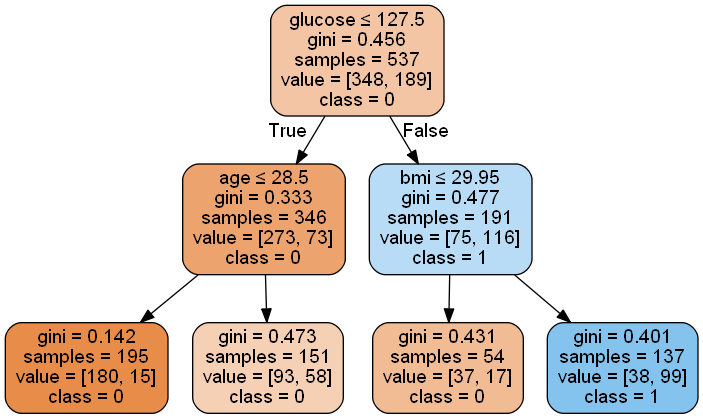

In [6]:
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled= True, rounded=True, special_characters= True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_test.png')
Image(graph.create_png())

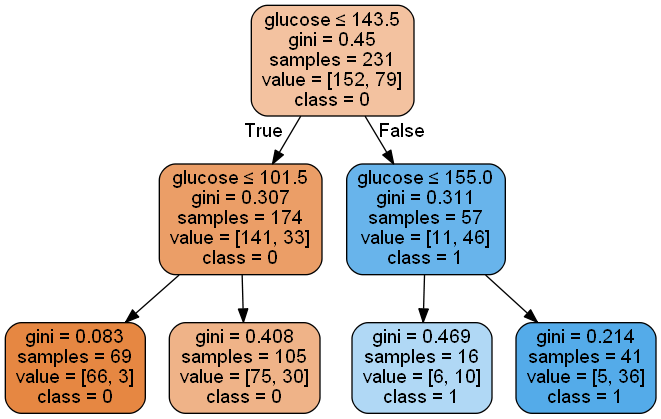

In [7]:
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_test, y_test)
y_pred = clf.predict(X_train)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled= True, rounded=True, special_characters= True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_train.png')
Image(graph.create_png())